In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error
from matplotlib.pyplot import figure

In [2]:
import os
import sys

ruta =os.getcwd()
sys.path.append(ruta)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Leer los archivos CSV
df_historico = pd.read_csv("data/datos_historicos.csv")
df_nuevos = pd.read_csv("data/datos_nuevos_creditos.csv")

In [ ]:
# Exploración inicial de los datos históricos
df_historico.head()  # Visualizamos las primeras filas para entender la estructura

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NoPaidPerc
0,1,384,0.016560,37950,20,0,2,17355,9,28,Mortgage,Bachelor,Divorced,18,0.196566
1,2,516,0.138825,22909,46,5,8,7175,13,0,Rent,Bachelor,Married,9,0.264438
2,3,638,0.391149,126521,80,5,7,1910,6,25,Rent,Bachelor,Single,9,0.287568
3,4,363,0.463521,39543,54,9,0,19339,5,22,Own,High School,Widowed,3,0.181348
4,5,804,0.504824,38522,72,1,10,7928,18,19,Own,PhD,Married,5,0.343376


In [ ]:
# Estadísticos descriptivos de una variable clave
## 'NumberOfTimesPastDue' mide las veces que el cliente ha incumplido con pagos
mean_past_due = df_historico['NumberOfTimesPastDue'].mean()
std_past_due = df_historico['NumberOfTimesPastDue'].std()
min_past_due = df_historico['NumberOfTimesPastDue'].min()
max_past_due = df_historico['NumberOfTimesPastDue'].max()
percentiles = df_historico['NumberOfTimesPastDue'].quantile([0.25, 0.5, 0.75])

In [7]:
print(f"Promedio de pagos atrasados: {mean_past_due:.2f}")
print(f"Desviación estándar: {std_past_due:.2f}")
print(f"Valor mínimo: {min_past_due}")
print(f"Valor máximo: {max_past_due}")
print("Percentiles:")
print(percentiles)

Promedio de pagos atrasados: 9.49
Desviación estándar: 5.77
Valor mínimo: 0
Valor máximo: 19
Percentiles:
0.25     4.0
0.50    10.0
0.75    14.0
Name: NumberOfTimesPastDue, dtype: float64


In [ ]:
# Clasificación de riesgo basada en NumberOfTimesPastDue (Número de pagos atrasados))
def clasificar_riesgo(pagos_atrasados):
    if pagos_atrasados == 0:
        return "Sin riesgo"
    elif 1 <= pagos_atrasados <= 4:
        return "Riesgo bajo"
    elif 5 <= pagos_atrasados <= 10:
        return "Riesgo medio"
    elif 11 <= pagos_atrasados <= 14:
        return "Riesgo alto"
    else:
        return "Riesgo muy alto"

In [9]:
# Aplicar la clasificación al DataFrame
df_historico['RiesgoPagAtrazo'] = df_historico['NumberOfTimesPastDue'].apply(clasificar_riesgo)
df_nuevos['RiesgoPagAtrazo'] = df_nuevos['NumberOfTimesPastDue'].apply(clasificar_riesgo)

In [ ]:
# Mostrar los resultados de distribución de clientes por nivel de riesgo
print(df_historico['RiesgoPagAtrazo'].value_counts())

RiesgoPagAtrazo
Riesgo medio       2985
Riesgo muy alto    2465
Riesgo alto        2033
Riesgo bajo        2004
Sin riesgo          513
Name: count, dtype: int64


In [11]:
df_historico.head(5)

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NoPaidPerc,RiesgoPagAtrazo
0,1,384,0.016560,37950,20,0,2,17355,9,28,Mortgage,Bachelor,Divorced,18,0.196566,Riesgo medio
1,2,516,0.138825,22909,46,5,8,7175,13,0,Rent,Bachelor,Married,9,0.264438,Riesgo alto
2,3,638,0.391149,126521,80,5,7,1910,6,25,Rent,Bachelor,Single,9,0.287568,Riesgo medio
3,4,363,0.463521,39543,54,9,0,19339,5,22,Own,High School,Widowed,3,0.181348,Riesgo medio
4,5,804,0.504824,38522,72,1,10,7928,18,19,Own,PhD,Married,5,0.343376,Riesgo muy alto


In [12]:
df_nuevos.head(5)

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NewLoanApplication,RiesgoPagAtrazo
0,10001,737,0.479047,34979,63,6,12,2904,8,15,Mortgage,High School,Widowed,20,37752.0,Riesgo medio
1,10002,411,0.442930,56459,28,7,4,17639,11,4,Rent,High School,Widowed,21,52917.0,Riesgo alto
2,10003,732,0.532314,76570,26,5,8,17730,7,10,Rent,High School,Widowed,10,106380.0,Riesgo medio
3,10004,710,0.295541,86752,51,8,16,7166,16,18,Mortgage,Masters,Widowed,17,35830.0,Riesgo muy alto
4,10005,848,0.248378,102286,29,4,8,4688,16,1,Own,High School,Widowed,26,32816.0,Riesgo muy alto


In [13]:
# Guardar el DataFrame con la nueva columna 'RiesgoPagAtrazo' en un archivo CSV
df_historico.to_csv("data/datos_historicos_clasificados.csv", index=False)

In [14]:
def detectar_nulos(df):
    # Contar los valores nulos en cada columna
    conteo_nulos = df.isnull().sum()
    
    # Filtrar las columnas que tienen valores nulos
    columnas_con_nulos = conteo_nulos[conteo_nulos > 0]
    
    # Mostrar el resultado
    if columnas_con_nulos.empty:
        print("No se encontraron columnas con valores nulos.")
    else:
        print("Columnas con valores nulos:")
        print(columnas_con_nulos)
    
    # Retornar el resultado
    return columnas_con_nulos

In [15]:
nulos_detectados = detectar_nulos(df_historico)

No se encontraron columnas con valores nulos.


In [16]:
nulos_detectados = detectar_nulos(df_nuevos)

No se encontraron columnas con valores nulos.


In [17]:
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   CreditScore                      10000 non-null  int64  
 2   DebtRatio                        10000 non-null  float64
 3   Assets                           10000 non-null  int64  
 4   Age                              10000 non-null  int64  
 5   NumberOfDependents               10000 non-null  int64  
 6   NumberOfOpenCreditLinesAndLoans  10000 non-null  int64  
 7   MonthlyIncome                    10000 non-null  int64  
 8   NumberOfTimesPastDue             10000 non-null  int64  
 9   EmploymentLength                 10000 non-null  int64  
 10  HomeOwnership                    10000 non-null  object 
 11  Education                        10000 non-null  object 
 12  MaritalStatus      

In [18]:
df_nuevos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1058 non-null   int64  
 1   CreditScore                      1058 non-null   int64  
 2   DebtRatio                        1058 non-null   float64
 3   Assets                           1058 non-null   int64  
 4   Age                              1058 non-null   int64  
 5   NumberOfDependents               1058 non-null   int64  
 6   NumberOfOpenCreditLinesAndLoans  1058 non-null   int64  
 7   MonthlyIncome                    1058 non-null   int64  
 8   NumberOfTimesPastDue             1058 non-null   int64  
 9   EmploymentLength                 1058 non-null   int64  
 10  HomeOwnership                    1058 non-null   object 
 11  Education                        1058 non-null   object 
 12  MaritalStatus       

In [ ]:
# Transformación de variables categóricas a numéricas
categorical_features = ['HomeOwnership', 'Education', 'MaritalStatus','RiesgoPagAtrazo']
label_encoders = {}

# Crear copias de los DataFrames originales
df_historico_mod = df_historico.copy()
df_nuevos_mod = df_nuevos.copy()

for feature in categorical_features:
    le = LabelEncoder()
    df_historico_mod[feature] = le.fit_transform(df_historico_mod[feature])
    df_nuevos_mod[feature] = le.transform(df_nuevos_mod[feature])
    label_encoders[feature] = le


In [20]:
df_historico_mod.head()

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NoPaidPerc,RiesgoPagAtrazo
0,1,384,0.016560,37950,20,0,2,17355,9,28,0,0,0,18,0.196566,2
1,2,516,0.138825,22909,46,5,8,7175,13,0,2,0,1,9,0.264438,0
2,3,638,0.391149,126521,80,5,7,1910,6,25,2,0,2,9,0.287568,2
3,4,363,0.463521,39543,54,9,0,19339,5,22,1,1,3,3,0.181348,2
4,5,804,0.504824,38522,72,1,10,7928,18,19,1,3,1,5,0.343376,3


In [21]:
df_historico_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   CreditScore                      10000 non-null  int64  
 2   DebtRatio                        10000 non-null  float64
 3   Assets                           10000 non-null  int64  
 4   Age                              10000 non-null  int64  
 5   NumberOfDependents               10000 non-null  int64  
 6   NumberOfOpenCreditLinesAndLoans  10000 non-null  int64  
 7   MonthlyIncome                    10000 non-null  int64  
 8   NumberOfTimesPastDue             10000 non-null  int64  
 9   EmploymentLength                 10000 non-null  int64  
 10  HomeOwnership                    10000 non-null  int64  
 11  Education                        10000 non-null  int64  
 12  MaritalStatus      

In [22]:
df_nuevos_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1058 non-null   int64  
 1   CreditScore                      1058 non-null   int64  
 2   DebtRatio                        1058 non-null   float64
 3   Assets                           1058 non-null   int64  
 4   Age                              1058 non-null   int64  
 5   NumberOfDependents               1058 non-null   int64  
 6   NumberOfOpenCreditLinesAndLoans  1058 non-null   int64  
 7   MonthlyIncome                    1058 non-null   int64  
 8   NumberOfTimesPastDue             1058 non-null   int64  
 9   EmploymentLength                 1058 non-null   int64  
 10  HomeOwnership                    1058 non-null   int64  
 11  Education                        1058 non-null   int64  
 12  MaritalStatus       

In [ ]:
# Seleccion de variables relevantes
features = ['CreditScore', 'DebtRatio', 'Assets', 'Age', 'NumberOfDependents',
            'NumberOfOpenCreditLinesAndLoans', 'MonthlyIncome', 'NumberOfTimesPastDue',
            'EmploymentLength', 'HomeOwnership', 'Education', 'MaritalStatus',
            'YearsAtCurrentAddress','RiesgoPagAtrazo']
target = 'NoPaidPerc'

In [24]:
X_historico = df_historico_mod[features]
y_historico = df_historico_mod[target]
X_nuevos = df_nuevos_mod[features]

In [ ]:
# Escalado de las variables numéricas
scaler = StandardScaler()
X_historico = scaler.fit_transform(X_historico)
X_nuevos = scaler.transform(X_nuevos)

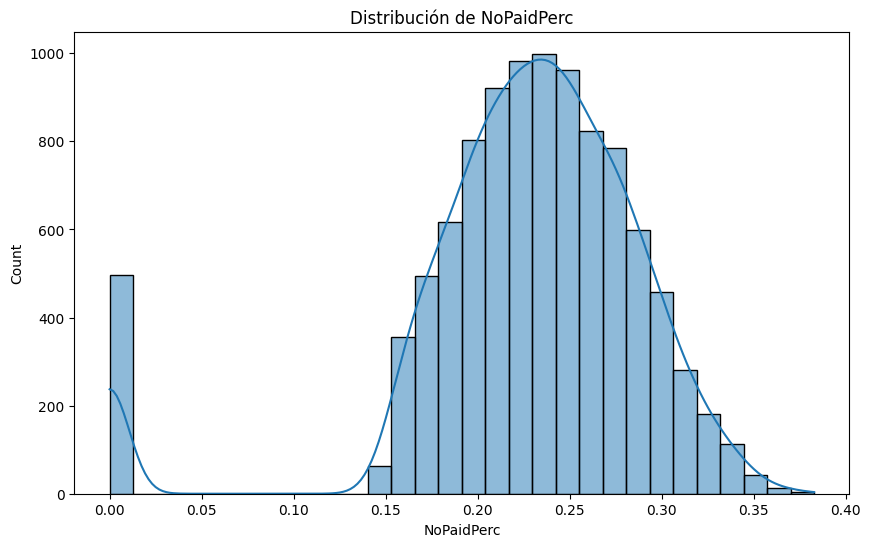

In [26]:
# Análisis exploratorio de datos (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(df_historico_mod['NoPaidPerc'], kde=True, bins=30)
plt.title('Distribución de NoPaidPerc')
plt.show()

<Axes: >

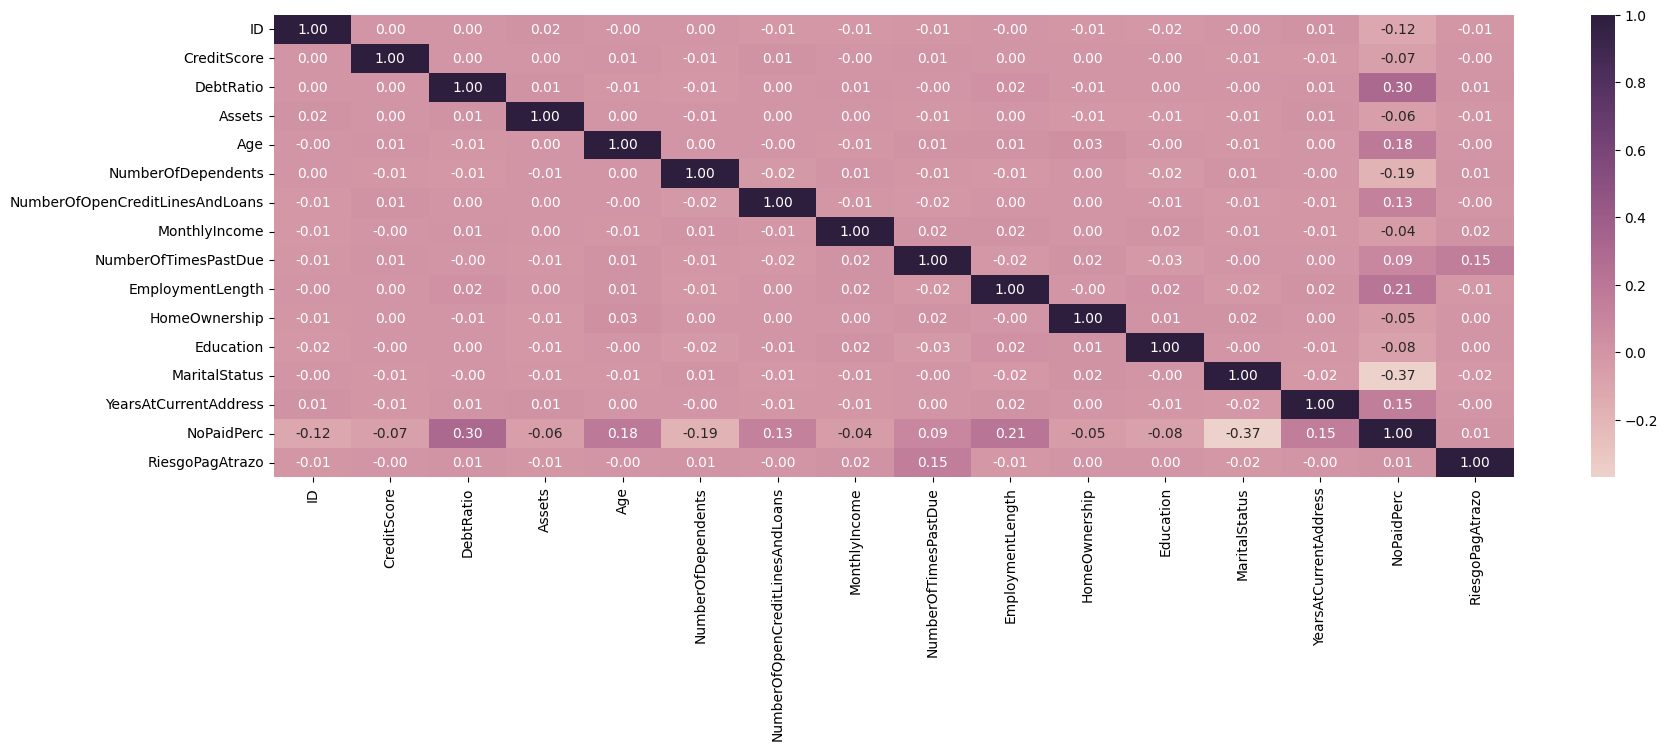

In [27]:
#Mapa de calor para ver las correlaciones entre variables
df_hist_num = df_historico_mod.select_dtypes(include=['number'])
figure(figsize=(20,6))
sns.heatmap(df_hist_num.corr(),cmap = sns.cubehelix_palette(as_cmap=True), annot = True, fmt = ".2f")

In [28]:
# Evaluar varios modelos
# 20% para los datos de prueba y 80% para entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X_historico, y_historico, test_size=0.2, random_state=42)

In [29]:
# Definimos los modelos
models = {
    "Linear Regression": LinearRegression(), # Es un modelo sencillo y rápido de entrenar, ideal para obtener una línea base y entender relaciones lineales entre las características y la variable objetivo.    
    "Lasso Regression": Lasso(), # Modelos de regularización para manejar el problema de multicolinealidad y reducir el riesgo de sobreajuste en la regresión lineal
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42), #Es un método de ensamble basado en múltiples árboles de decisión, que mejora la precisión y reduce el sobreajuste.
    "Decision Tree": DecisionTreeRegressor(random_state=42), #Es fácil de interpretar y visualizar, proporciona una buena base para entender cómo funcionan los métodos de ensamble como Random Forest y Gradient Boosting.
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42), # Es un método de ensamble potente que optimiza los errores residuales de los modelos previos, proporcionando alta precisión.    
    "K-Nearest Neighbors": KNeighborsRegressor() # Predice el valor de la variable objetivo para una observación basada en el promedio de los valores de las k observaciones más cercanas
}

In [30]:
# Evaluar los modelos
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MSE": mse, # Valores más bajos indican un mejor ajuste del modelo a los datos.
        "RMSE": rmse, # Valores más bajos indican un mejor ajuste del modelo a los datos.
        "R2": r2, # Valores más cercanos a 1 indican un mejor ajuste del modelo a los datos.
        "MAE": mae, # Valores más bajos indican un mejor rendimiento del modelo.
        "MedAE": medae,
        "Explained Variance": evs  #Valores más cercanos a 1 indican un mejor ajuste del modelo a los datos.

    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model       MSE      RMSE        R2       MAE     MedAE  \
0    Linear Regression  0.002738  0.052324  0.392445  0.037627  0.028413   
1     Lasso Regression  0.004515  0.067195 -0.001981  0.047062  0.035161   
2        Random Forest  0.001225  0.035003  0.728107  0.023439  0.016523   
3        Decision Tree  0.002756  0.052500  0.388368  0.034015  0.023178   
4    Gradient Boosting  0.001183  0.034395  0.737482  0.022818  0.016348   
5  K-Nearest Neighbors  0.002112  0.045956  0.531343  0.032058  0.023777   

   Explained Variance  
0            0.392456  
1            0.000000  
2            0.728382  
3            0.388748  
4            0.737656  
5            0.531610  


In [31]:
# Mostrar los resultados
results_df = pd.DataFrame(results).T
print(results_df)

                                    0                 1              2  \
Model               Linear Regression  Lasso Regression  Random Forest   
MSE                          0.002738          0.004515       0.001225   
RMSE                         0.052324          0.067195       0.035003   
R2                           0.392445         -0.001981       0.728107   
MAE                          0.037627          0.047062       0.023439   
MedAE                        0.028413          0.035161       0.016523   
Explained Variance           0.392456               0.0       0.728382   

                                3                  4                    5  
Model               Decision Tree  Gradient Boosting  K-Nearest Neighbors  
MSE                      0.002756           0.001183             0.002112  
RMSE                       0.0525           0.034395             0.045956  
R2                       0.388368           0.737482             0.531343  
MAE                      0.

In [43]:
# El mejor modelo basado en los resultados proporcionados es el Gradient Boosting. Tiene el MSE más bajo y el R2 más alto entre todos los modelos evaluados. Esto indica que tiene la capacidad más sólida para explicar la variabilidad en la variable objetivo y hacer predicciones precisas.
best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model.fit(X_historico, y_historico)

GradientBoostingRegressor(random_state=42)

In [33]:
# Predecimos la probabilidad de no pago para los nuevos creditos
y_pred_nuevos = best_model.predict(X_nuevos)

In [34]:
#Asignamos la probabilidad de no pago a los nuevos creditos
df_nuevos['probNoPago'] = y_pred_nuevos

In [35]:
df_nuevos.head(20)

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NewLoanApplication,RiesgoPagAtrazo,probNoPago
0,10001,737,0.479047,34979,63,6,12,2904,8,15,Mortgage,High School,Widowed,20,37752.0,Riesgo medio,0.170585
1,10002,411,0.442930,56459,28,7,4,17639,11,4,Rent,High School,Widowed,21,52917.0,Riesgo alto,0.110997
2,10003,732,0.532314,76570,26,5,8,17730,7,10,Rent,High School,Widowed,10,106380.0,Riesgo medio,0.091589
3,10004,710,0.295541,86752,51,8,16,7166,16,18,Mortgage,Masters,Widowed,17,35830.0,Riesgo muy alto,0.104716
4,10005,848,0.248378,102286,29,4,8,4688,16,1,Own,High School,Widowed,26,32816.0,Riesgo muy alto,0.108010
5,10006,828,0.343173,72326,66,9,7,4809,13,27,Mortgage,High School,Divorced,9,57708.0,Riesgo alto,0.188302
6,10007,433,0.688842,117902,43,8,0,17240,15,13,Mortgage,Masters,Divorced,3,103440.0,Riesgo muy alto,0.166103
7,10008,624,0.007985,152049,34,5,7,12710,9,2,Rent,High School,Widowed,14,139810.0,Riesgo medio,0.030732
8,10009,685,0.091246,110153,65,7,7,10950,4,28,Rent,Masters,Divorced,1,229950.0,Riesgo bajo,0.174107
9,10010,502,0.123041,156750,49,6,5,13097,3,7,Own,High School,Divorced,16,248843.0,Riesgo bajo,0.182913


In [36]:
# --- Segmentación con 5 Categorías ---
# Definir rangos para los 5 segmentos (Riesgo bajo, Riesgo medio, Riesgo alto, Riesgo muy alto, Sin riesgo)
rango = [0, 0.1, 0.3, 0.6, 0.9, 1.0]
etiqueta = ['Sin riesgo', 'Riesgo bajo', 'Riesgo medio', 'Riesgo alto', 'Riesgo muy alto']

df_nuevos['Segment'] = pd.cut(df_nuevos['probNoPago'], bins=rango, labels=etiqueta)

# Asignar tasas promedio para cada segmento
segment_rates = {
    'Sin riesgo': 0.01,  # 1% adicional
    'Riesgo bajo': 0.03,  # 3% adicional
    'Riesgo medio': 0.06,  # 6% adicional
    'Riesgo alto': 0.10,   # 10% adicional
    'Riesgo muy alto': 0.15  # 15% adicional
}

df_nuevos['int_rc_Segment'] = df_nuevos['Segment'].map(segment_rates)
df_nuevos['int_rc_Segment'] = df_nuevos['int_rc_Segment'].astype(float)

# Calcular tasas de interés total 
tasa_costo_operativo = 0.05
tasa_margen_esperado = 0.10
df_nuevos['int_rc'] = (
    tasa_costo_operativo + tasa_margen_esperado + df_nuevos['int_rc_Segment']
)

In [37]:
df_nuevos.head(20)

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NewLoanApplication,RiesgoPagAtrazo,probNoPago,Segment,int_rc_Segment,int_rc
0,10001,737,0.479047,34979,63,6,12,2904,8,15,Mortgage,High School,Widowed,20,37752.0,Riesgo medio,0.170585,Riesgo bajo,0.03,0.18
1,10002,411,0.442930,56459,28,7,4,17639,11,4,Rent,High School,Widowed,21,52917.0,Riesgo alto,0.110997,Riesgo bajo,0.03,0.18
2,10003,732,0.532314,76570,26,5,8,17730,7,10,Rent,High School,Widowed,10,106380.0,Riesgo medio,0.091589,Sin riesgo,0.01,0.16
3,10004,710,0.295541,86752,51,8,16,7166,16,18,Mortgage,Masters,Widowed,17,35830.0,Riesgo muy alto,0.104716,Riesgo bajo,0.03,0.18
4,10005,848,0.248378,102286,29,4,8,4688,16,1,Own,High School,Widowed,26,32816.0,Riesgo muy alto,0.108010,Riesgo bajo,0.03,0.18
5,10006,828,0.343173,72326,66,9,7,4809,13,27,Mortgage,High School,Divorced,9,57708.0,Riesgo alto,0.188302,Riesgo bajo,0.03,0.18
6,10007,433,0.688842,117902,43,8,0,17240,15,13,Mortgage,Masters,Divorced,3,103440.0,Riesgo muy alto,0.166103,Riesgo bajo,0.03,0.18
7,10008,624,0.007985,152049,34,5,7,12710,9,2,Rent,High School,Widowed,14,139810.0,Riesgo medio,0.030732,Sin riesgo,0.01,0.16
8,10009,685,0.091246,110153,65,7,7,10950,4,28,Rent,Masters,Divorced,1,229950.0,Riesgo bajo,0.174107,Riesgo bajo,0.03,0.18
9,10010,502,0.123041,156750,49,6,5,13097,3,7,Own,High School,Divorced,16,248843.0,Riesgo bajo,0.182913,Riesgo bajo,0.03,0.18


In [39]:
df_nuevos.tail(10)

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NewLoanApplication,RiesgoPagAtrazo,probNoPago,Segment,int_rc_Segment,int_rc
1048,11049,609,0.425572,188556,49,1,0,4650,1,1,Rent,PhD,Widowed,29,60450.0,Riesgo bajo,0.119394,Riesgo bajo,0.03,0.18
1049,11050,407,0.182173,54217,60,9,14,6472,1,21,Mortgage,PhD,Widowed,16,51776.0,Riesgo bajo,0.142968,Riesgo bajo,0.03,0.18
1050,11051,684,0.005942,62154,18,3,19,12212,10,28,Mortgage,High School,Married,4,36636.0,Riesgo medio,0.197422,Riesgo bajo,0.03,0.18
1051,11052,528,0.096415,81374,81,3,0,12471,17,6,Rent,High School,Widowed,1,162123.0,Riesgo muy alto,0.073003,Sin riesgo,0.01,0.16
1052,11053,829,0.763313,133454,48,2,1,18454,10,2,Mortgage,High School,Widowed,25,276810.0,Riesgo medio,0.163686,Riesgo bajo,0.03,0.18
1053,11054,603,0.257370,179888,37,0,17,19788,8,1,Mortgage,High School,Widowed,23,356184.0,Riesgo medio,0.115145,Riesgo bajo,0.03,0.18
1054,11055,710,0.690966,178287,48,6,8,13469,3,14,Rent,Bachelor,Widowed,14,282849.0,Riesgo bajo,0.171774,Riesgo bajo,0.03,0.18
1055,11056,642,0.099068,195318,45,5,19,15991,0,6,Own,PhD,Single,22,319820.0,Sin riesgo,0.226075,Riesgo bajo,0.03,0.18
1056,11057,790,0.164651,109782,59,8,17,9726,7,17,Own,High School,Widowed,28,116712.0,Riesgo medio,0.120855,Riesgo bajo,0.03,0.18
1057,11058,643,0.633910,67051,85,3,1,7034,4,0,Rent,High School,Married,1,105510.0,Riesgo bajo,0.200814,Riesgo bajo,0.03,0.18


In [38]:
# Guardar el DataFrame en un archivo CSV
df_nuevos.to_csv("data/datos_nuevos_creditos_analisis.csv", index=False)